In [11]:
%load_ext watermark
%watermark -v -p sklearn,numpy,scipy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.3
IPython 6.2.1

sklearn 0.19.1
numpy 1.14.0
scipy 1.0.0
matplotlib 2.1.2


In [12]:
from jupyterthemes import jtplot
jtplot.style()

import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

#### Dataset Prepare
1. Check weather there is __NaN__ in data.
2. Cehck data's __type__
3. After you delete NaN data, __count__ data

### 1. target
    - ["Sex", "Equipment"]
### 2. featuer
    - ["Age", "BodyweightKg", "WeightClassKg", "BestSquatKg", "BestBenchKg", "BestDeadliftKg"]

In [13]:
columns = ["Sex", "Equipment", "Age", "BodyweightKg", "WeightClassKg", "BestSquatKg", "BestBenchKg", "BestDeadliftKg"]

target_cols = ["Sex", "Equipment"]
feature_cols = ["Age", "BodyweightKg", "WeightClassKg", "BestSquatKg", "BestBenchKg", "BestDeadliftKg"]

df = pd.read_csv("/Users/naver/ml_study/data/openpowerlifting.csv", usecols=columns)
df = df.dropna(axis=0)
df["WeightClassKg"] = df["WeightClassKg"].str.replace("+", "")
df["WeightClassKg"] =df["WeightClassKg"].astype(float)


In [14]:
df

,Sex,Equipment,Age,BodyweightKg,WeightClassKg,BestSquatKg,BestBenchKg,BestDeadliftKg
0,F,Wraps,47.0,59.60,60.0,47.63,20.41,70.31
1,F,Single-ply,42.0,58.51,60.0,142.88,95.25,163.29
2,F,Single-ply,42.0,58.51,60.0,142.88,95.25,163.29
5,F,Wraps,28.0,62.41,67.5,170.10,77.11,145.15
6,F,Raw,60.0,67.31,67.5,124.74,95.25,163.29
7,F,Raw,60.0,67.31,67.5,124.74,95.25,163.29
8,F,Wraps,52.0,65.95,67.5,120.20,54.43,108.86
10,F,Wraps,24.0,65.50,67.5,138.35,65.77,136.08
11,F,Wraps,56.0,71.21,75.0,120.20,43.09,129.27
12,F,Wraps,56.0,71.21,75.0,120.20,43.09,129.27


In [15]:
for column in columns[2:]:
    print(type(df[column].values[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


### Predict Sex

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_num: int = 7
random_state_num: int = 20
score_train_set: dict = {}
score_test_set: dict = {}

for i in range(1, n_neighbors_num):    
    temp_train_set: list = []
    temp_test_set: list = []
    for r in range(random_state_num):
        x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df[target_cols[0]], random_state=r)        
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train)
        temp_train_set.append(clf.score(x_train, y_train))
        temp_test_set.append(clf.score(x_test, y_test))
    score_train_set[i] = temp_train_set
    score_test_set[i] = temp_test_set
    print(i)

1
2
3
4
5
6


In [17]:
score_test_set_values = list(score_test_set.values())
score_test_set_values = np.array(score_test_set_values)
score_test_set_values = np.mean(score_test_set_values, axis=1)

score_train_set_values = list(score_train_set.values())
score_train_set_values = np.array(score_train_set_values)
score_train_set_values = np.mean(score_train_set_values, axis=1)


print(f"score_test_set_values : {score_test_set_values}")
print(f"score_train_set_values : {score_train_set_values}")

score_test_set_values : [0.94503117 0.93857695 0.94599264 0.94368662 0.94789679 0.94655224]
score_train_set_values : [1.         0.97181917 0.97038885 0.96242222 0.96233146 0.95890432]


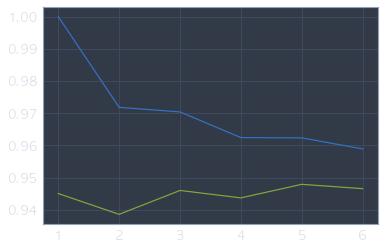

In [18]:
plt.plot(range(1, n_neighbors_num), score_test_set_values, c="g")
plt.plot(range(1, n_neighbors_num), score_train_set_values, c="b")
plt.xticks(range(1, n_neighbors_num))
plt.show()

### Predix "Equipment"

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_num: int = 7
random_state_num: int = 20
score_train_set: dict = {}
score_test_set: dict = {}

for i in range(1, n_neighbors_num):    
    temp_train_set: list = []
    temp_test_set: list = []
    for r in range(random_state_num):
        x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df[target_cols[1]], random_state=r)        
        clf = KNeighborsClassifier(n_neighbors=i)
        clf.fit(x_train, y_train)
        temp_train_set.append(clf.score(x_train, y_train))
        temp_test_set.append(clf.score(x_test, y_test))
    score_train_set[i] = temp_train_set
    score_test_set[i] = temp_test_set
    print(i)

1
2
3
4
5
6


In [23]:
score_test_set_values = list(score_test_set.values())
score_test_set_values = np.array(score_test_set_values)
score_test_set_values = np.mean(score_test_set_values, axis=1)

score_train_set_values = list(score_train_set.values())
score_train_set_values = np.array(score_train_set_values)
score_train_set_values = np.mean(score_train_set_values, axis=1)


print(f"score_test_set_values : {score_test_set_values}")
print(f"score_train_set_values : {score_train_set_values}")

score_test_set_values : [0.68457711 0.70339142 0.69230264 0.70830955 0.7051491  0.71261924]
score_train_set_values : [0.99939657 0.83974924 0.82484695 0.79107252 0.78318164 0.76968276]


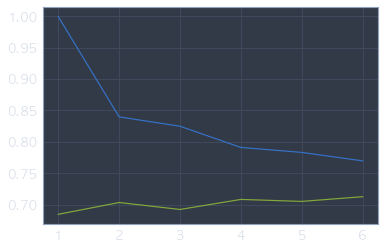

In [24]:
plt.plot(range(1, n_neighbors_num), score_test_set_values, c="g")
plt.plot(range(1, n_neighbors_num), score_train_set_values, c="b")
plt.xticks(range(1, n_neighbors_num))
plt.show()